In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

import tensorflow as tf
import keras
from keras.layers import Dense, Flatten
from keras.layers import MaxPooling2D, Dropout, Conv2D, Activation
import numpy as np
import numpy.random as random
import pylab as plt
from keras.datasets import mnist, cifar10
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from sklearn import svm
import time
from datetime import datetime
import matplotlib

from infotools import *

In [4]:
import pickle
(I_MY, I_MYL, I_MY_train, lin_accs) = pickle.load( open('cifar-hard-f30-300ep-b64-screenrun.p', 'rb' )) #  , encoding='latin1'
print(I_MY.shape)
print(len(lin_accs))
# compute best linear

(10, 300)
10


In [0]:
I_MY = I_MY[:, :100]
I_MYL = I_MYL[:, :100]
I_MY_train = I_MY_train[:, :100]

In [0]:

def H(q): # binary entropy
    return -q*np.log2(q) - (1-q)*np.log2(1-q)


/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


<Figure size 7200x4800 with 0 Axes>

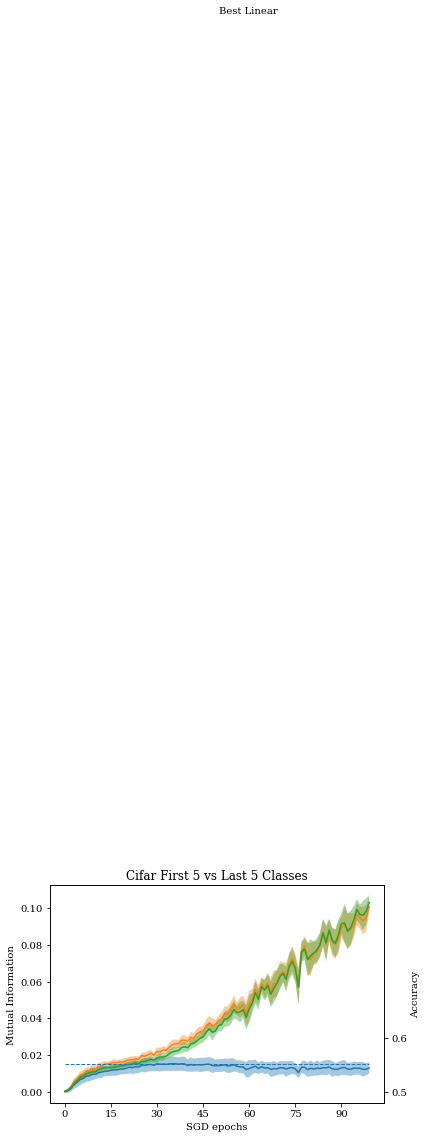

In [33]:
plt.rcParams["font.family"] = 'serif'
plt.figure(dpi=1200)
gap = I_MY - I_MYL
best_lin = lin_accs
eps = len(gap[0])


lin_acc = best_lin[0]

fig, ax1 = plt.subplots()
# ax1.plot(range(eps), gap.mean(axis=0), label='I(Model(x); Y) - I(Model(x); Y | Lin(x))')
ax1.plot(range(eps), gap.mean(axis=0), label='I(F$_t$; Y) - I(F$_t$; Y | Lin)')
ax1.fill_between(range(eps), gap.mean(axis=0)-gap.std(axis=0), gap.mean(axis=0)+gap.std(axis=0), alpha=0.4)
# ax1.plot(range(eps), I_MY.mean(axis=0), label='I(Model(x); Y)')
ax1.plot(range(eps), I_MY.mean(axis=0), label='I(F$_t$; Y)')
ax1.fill_between(range(eps), I_MY.mean(axis=0)-0.5*I_MY.std(axis=0), I_MY.mean(axis=0)+0.5*I_MY.std(axis=0), alpha=0.4)

ax1.plot(range(eps), I_MY_train.mean(axis=0), label='I(F$_t$; Y$_S$)')
ax1.fill_between(range(eps), I_MY_train.mean(axis=0)-0.5*I_MY_train.std(axis=0), I_MY_train.mean(axis=0)+0.5*I_MY_train.std(axis=0), alpha=0.4)


# ax1.plot(range(eps), I_LYM.mean(axis=0), label='I(Lin(x); Y | Model(x))')
# ax1.plot(range(eps), I_LYM.mean(axis=0), label='I(L(x); Y | M(x))')
# ax1.fill_between(range(eps), I_LYM.mean(axis=0)-I_LYM.std(axis=0), I_LYM.mean(axis=0)+I_LYM.std(axis=0), alpha=0.3)

ax1.plot(range(eps), 1-H(lin_acc)*np.ones(eps), linestyle='--', linewidth=1, label='Best Linear', color='C0')

plt.text(range(eps)[-50],  lin_acc+0.015, 'Best Linear')

plt.xlabel("SGD epochs")
plt.ylabel("Mutual Information")
# plt.grid(True, axis='y')

# ax1.legend()
ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax2 = ax1.twinx()
ax2.plot(ax1.get_ylim(), alpha=0)
ax2.set_ylabel("Accuracy")
ax2.set_ylim(ax1.get_ylim())

# l = ax1.get_ylim()
# l2 = ax2.get_ylim()
labels = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
# f = lambda x : l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])
# ticks = f(1-H(labels))
ax2.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(1-H(labels)))
ax2.set_yticklabels(labels)
plt.title('Cifar First 5 vs Last 5 Classes')

labels = np.linspace(0.5, 1, 6)



# ax2.set_yticks(ytx2)
fig.tight_layout()
plt.savefig('sinus_plot.pdf')

In [36]:
plt.rcParams["font.family"] = 'serif'
fig = plt.figure(dpi=1200)
ax1 = plt.gca()
gap = I_MY - I_MYL
best_lin = lin_accs
eps = len(gap[0])


lin_acc = best_lin[0]

# fig, ax1 = plt.subplots()
# ax1.plot(range(eps), gap.mean(axis=0), label='I(Model(x); Y) - I(Model(x); Y | Lin(x))')
ax1.plot(range(eps), gap.mean(axis=0), label='I(F$_t$; Y) - I(F$_t$; Y | Lin)')
ax1.fill_between(range(eps), gap.mean(axis=0)-gap.std(axis=0), gap.mean(axis=0)+gap.std(axis=0), alpha=0.4)
# ax1.plot(range(eps), I_MY.mean(axis=0), label='I(Model(x); Y)')
ax1.plot(range(eps), I_MY.mean(axis=0), label='I(F$_t$; Y)')
ax1.fill_between(range(eps), I_MY.mean(axis=0)-0.5*I_MY.std(axis=0), I_MY.mean(axis=0)+0.5*I_MY.std(axis=0), alpha=0.4)

ax1.plot(range(eps), I_MY_train.mean(axis=0), label='I(F$_t$; Y$_S$)')
ax1.fill_between(range(eps), I_MY_train.mean(axis=0)-0.5*I_MY_train.std(axis=0), I_MY_train.mean(axis=0)+0.5*I_MY_train.std(axis=0), alpha=0.4)


# ax1.plot(range(eps), I_LYM.mean(axis=0), label='I(Lin(x); Y | Model(x))')
# ax1.plot(range(eps), I_LYM.mean(axis=0), label='I(L(x); Y | M(x))')
# ax1.fill_between(range(eps), I_LYM.mean(axis=0)-I_LYM.std(axis=0), I_LYM.mean(axis=0)+I_LYM.std(axis=0), alpha=0.3)

ax1.plot(range(eps), 1-H(lin_acc)*np.ones(eps), linestyle='--', linewidth=1, label='Best Linear', color='C0')

plt.text(range(eps)[-50],  lin_acc+0.015, 'Best Linear')

plt.xlabel("SGD epochs")
plt.ylabel("Mutual Information")
# plt.grid(True, axis='y')

# ax1.legend()
ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax2 = ax1.twinx()
ax2.plot(ax1.get_ylim(), alpha=0)
ax2.set_ylabel("Accuracy")
ax2.set_ylim(ax1.get_ylim())

# l = ax1.get_ylim()
# l2 = ax2.get_ylim()
labels = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
# f = lambda x : l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])
# ticks = f(1-H(labels))
ax2.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(1-H(labels)))
ax2.set_yticklabels(labels)
plt.title('Cifar First 5 vs Last 5 Classes')

labels = np.linspace(0.5, 1, 6)



# ax2.set_yticks(ytx2)
fig.tight_layout()
plt.savefig('sinus_plot.pdf')

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


Error in callback <function flush_figures at 0x7fbf0ec032f0> (for post_execute):


KeyboardInterrupt: ignored

In [37]:
plt.rcParams["font.family"] = 'serif'
fig = plt.figure(dpi=1200)
ax1 = plt.gca()
gap = I_MY - I_MYL
best_lin = lin_accs
eps = len(gap[0])


lin_acc = best_lin[0]

# fig, ax1 = plt.subplots()
# ax1.plot(range(eps), gap.mean(axis=0), label='I(Model(x); Y) - I(Model(x); Y | Lin(x))')
ax1.plot(range(eps), gap.mean(axis=0), label='I(F$_t$; Y) - I(F$_t$; Y | Lin)')
ax1.fill_between(range(eps), gap.mean(axis=0)-gap.std(axis=0), gap.mean(axis=0)+gap.std(axis=0), alpha=0.4)
# ax1.plot(range(eps), I_MY.mean(axis=0), label='I(Model(x); Y)')
ax1.plot(range(eps), I_MY.mean(axis=0), label='I(F$_t$; Y)')
ax1.fill_between(range(eps), I_MY.mean(axis=0)-0.5*I_MY.std(axis=0), I_MY.mean(axis=0)+0.5*I_MY.std(axis=0), alpha=0.4)

ax1.plot(range(eps), I_MY_train.mean(axis=0), label='I(F$_t$; Y$_S$)')
ax1.fill_between(range(eps), I_MY_train.mean(axis=0)-0.5*I_MY_train.std(axis=0), I_MY_train.mean(axis=0)+0.5*I_MY_train.std(axis=0), alpha=0.4)



Error in callback <function flush_figures at 0x7fbf0ec032f0> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
plt.cla()

In [22]:
gap.shape

(10, 300)

In [0]:
plt.close()